**AGRICULTURAL DROUGHT PREDICTION with 98.925**

In [1]:
#import the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imshow

from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Sequential

/Users/marioaranda/Documents/GitHub/CS511Project/.env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


** Using the dataset from https://www.kaggle.com/crawford/deepsat-sat4

The input data was encoded into CSV files. The X_test_sat4.csv flattened the images that were 28 x 28 x 4 that were taken from space. The first three channels are the standard red, green, and blue channels in normal images. The 4th is a near-infrared band. We are using the smaller test set because the training set is too big. After extracting the data from the csv files, we can reshape it into the original images. Then, we can see the images before we train on them. The second file we are loading are the labels for each image. They can be one of 4: barren land, trees, grassland and other. Each row in the file looks like this [1,0,0,0], where only one of the 4 value is 1. If it is one, then it is that class respective to the order I showed above. If it was the above values, the image is a picture of barren land. If it was [0,1,0,0], then it would be forest land. If it was [0,0,1,0], then it would be grassland and so on.

In [2]:
# get current directory
# import os
# cwd = os.getcwd()
# print(cwd)

# #Reading dataset
X = pd.read_csv("data/elastic-notebook/data/deepsat-sat4/X_test_sat4.csv") #values are in DataFrame format
Y = pd.read_csv("data/elastic-notebook/data/deepsat-sat4/y_test_sat4.csv") #values are in DataFrame format
X = np.ascontiguousarray(X) # converting Dataframe to numpy array
Y = np.ascontiguousarray(Y) # converting Dataframe to numpy array


In [3]:
#Shape of data used
print("Train data shape: ",X.shape)

Train data shape:  (99999, 3136)


In [4]:
#reshaping (99999, 3136) to (99999, 28, 28, 4)
X = X.reshape([99999,28,28,4]).astype(float)
print("Reshaped data format: ",X.shape)

Reshaped data format:  (99999, 28, 28, 4)


In [5]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0) 

In [6]:
#format of train and test data
print("X train data shape: ",x_train.shape)
print("Y train data shape: ",y_train.shape)
print("X test data shape: ",x_test.shape)
print("Y test data shape: ",y_test.shape)

X train data shape:  (79999, 28, 28, 4)
Y train data shape:  (79999, 4)
X test data shape:  (20000, 28, 28, 4)
Y test data shape:  (20000, 4)


**Four type of classification is possible i.e**
* if y_train[x] == [1,0,0,0] Barren land(Drought)
* if y_train[x] == [0,1,0,0] Forest land
* if y_train[x] == [0,0,1,0] Grassland
* if y_train[x] == [0,0,0,1] Others

In [7]:
#normalizing train and test data
x_train = x_train/255
x_test = x_test/255

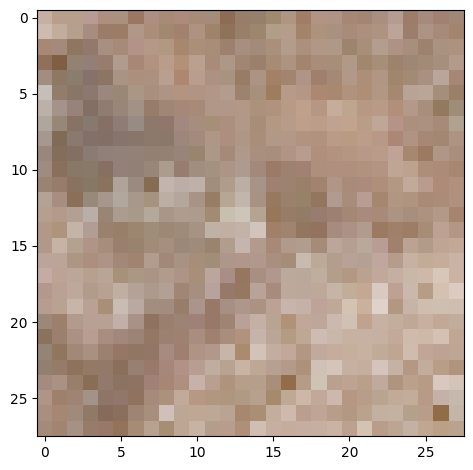

Ground Truth: Barren Land


In [8]:
#Images in the data with its label(reduced image)
img_no = 1276 #type a random number in inclusive range 0 to 79999
imshow(np.squeeze(x_train[img_no,:,:,0:3]).astype(float)) #taking only RGB format
plt.show()
print ('Ground Truth: ',end='')
if y_train[img_no, 0] == 1:
    print ('Barren Land')
elif y_train[img_no, 1] == 1:
    print ('Forest Land')
elif y_train[img_no, 2] == 1:
    print ('Grassland')
else:
    print ('Other')

Using **Convulutional Neural Network**

In [9]:
#defining layers
num_classes = 4
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,4),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, input_shape=(3136,), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#CNN Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        1184      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [11]:
#fitting the data into the model
model.fit(x_train,y_train,batch_size=64, epochs=20, verbose=1, validation_split=0.20)

Epoch 1/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.2436 - accuracy: 0.9072 - val_loss: 0.1047 - val_accuracy: 0.9645
Epoch 2/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.1052 - accuracy: 0.9621 - val_loss: 0.1073 - val_accuracy: 0.9634
Epoch 3/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0829 - accuracy: 0.9705 - val_loss: 0.1674 - val_accuracy: 0.9444
Epoch 4/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0738 - accuracy: 0.9734 - val_loss: 0.0633 - val_accuracy: 0.9771
Epoch 5/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0668 - accuracy: 0.9761 - val_loss: 0.0700 - val_accuracy: 0.9739
Epoch 6/20
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0570 - accuracy: 0.9798 - val_loss: 0.0705 - val_accuracy: 0.9769
Epoch 7/20
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0524 -

In [12]:
#predicting model performance
preds = model.predict(x_test, verbose=1)

625/625 [==============================] - 3s 4ms/step


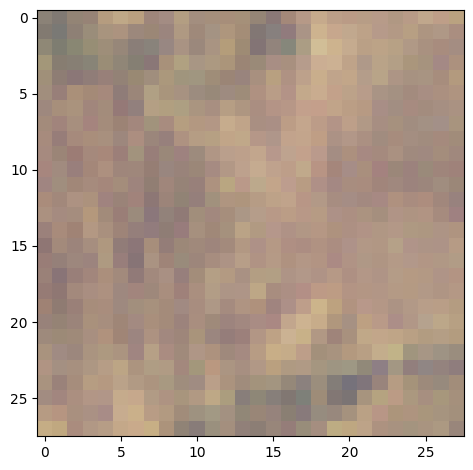

Predicted Label: Barren Land
Actual label: Barren Land


In [13]:
img_no = 587#Type a number between 0 and 20000 inclusive
imshow(np.squeeze(x_test[img_no,:,:,0:3]).astype(float)) #Only seeing the RGB channels
plt.show()
#Predicted classification
print ('Predicted Label: ',end='')
if preds[img_no, 0]*100  >= 80:
    print ('Barren Land')
elif preds[img_no, 1]*100 >= 80:
    print ('Forest Land')
elif preds[img_no, 2]*100 >= 80:
    print ('Grassland')
else:
    print ('Other')

#Acutal classification
print ('Actual label: ',end='')
if y_test[img_no, 0] == 1:
    print ('Barren Land')
elif y_test[img_no, 1] == 1:
    print ('Forest Land')
elif y_test[img_no, 2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [14]:
#model performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score: ",accuracy_score(y_test, np.round_(preds)))
print("Classification report:")
print(classification_report(y_test, np.round_(preds)))

Accuracy score:  0.9901
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5223
           1       1.00      1.00      1.00      4121
           2       0.97      0.98      0.98      3596
           3       1.00      1.00      1.00      7060

   micro avg       0.99      0.99      0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000
 samples avg       0.99      0.99      0.99     20000



/Users/marioaranda/Documents/GitHub/CS511Project/.env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print("Accuracy of CNN model is: ", accuracy_score(y_test,np.round_(preds))*100)

Accuracy of CNN model is:  99.00999999999999


**Mini project Implementation**  
* 1MS17CS025  D.S Rahul https://www.kaggle.com/dsrhul
* 1MS17CS053  M Chandan https://www.kaggle.com/chandanvirat18
* 1MS17CS056  Mahantesh Shivanand Shivakale https://www.kaggle.com/mahantesh8
* 1MS17CS153  Harini K.R
under guidance of Dr. Shilpa Chaudhari, Associate Professor at department of CSE, MSRIT